torch.Size([100, 1, 28, 28]) torch.Size([100])
Epoch [1/5], Step [100/600], Loss: 0.4657
Epoch [1/5], Step [200/600], Loss: 0.2736
Epoch [1/5], Step [300/600], Loss: 0.2380
Epoch [1/5], Step [400/600], Loss: 0.3950
Epoch [1/5], Step [500/600], Loss: 0.0742
Epoch [1/5], Step [600/600], Loss: 0.2490
Epoch [2/5], Step [100/600], Loss: 0.1712
Epoch [2/5], Step [200/600], Loss: 0.2136
Epoch [2/5], Step [300/600], Loss: 0.1861
Epoch [2/5], Step [400/600], Loss: 0.0746
Epoch [2/5], Step [500/600], Loss: 0.1403
Epoch [2/5], Step [600/600], Loss: 0.1214
Epoch [3/5], Step [100/600], Loss: 0.1296
Epoch [3/5], Step [200/600], Loss: 0.0808
Epoch [3/5], Step [300/600], Loss: 0.1075
Epoch [3/5], Step [400/600], Loss: 0.0480
Epoch [3/5], Step [500/600], Loss: 0.0962
Epoch [3/5], Step [600/600], Loss: 0.1710
Epoch [4/5], Step [100/600], Loss: 0.0527
Epoch [4/5], Step [200/600], Loss: 0.1396
Epoch [4/5], Step [300/600], Loss: 0.0587
Epoch [4/5], Step [400/600], Loss: 0.0453
Epoch [4/5], Step [500/600], 

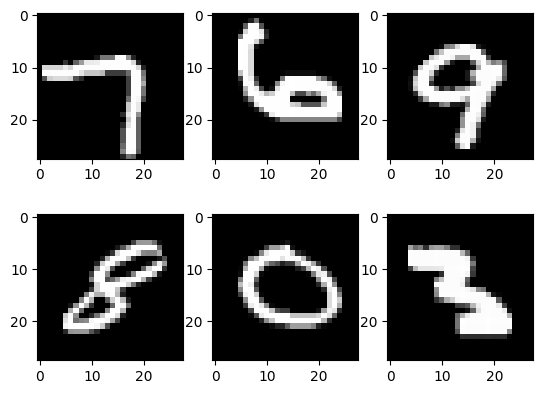

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#MNIST Data Classification Problem
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples , labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)% 100 == 0 :
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)

        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy = {acc} %')


